547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
===== SVM =====
Accuracy: 0.8954472660718371
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      9960
           1       0.93      0.93      0.93      3918
           2       0.70      0.97      0.81      3606

    accuracy                           0.90     17484
   macro avg       0.87      0.92      0.89     17484
weighted avg       0.92      0.90      0.90     17484



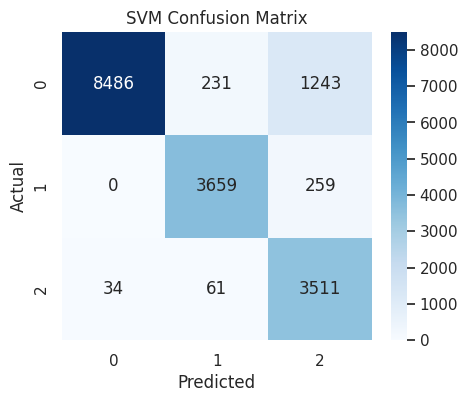

===== XGBoost =====
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9960
           1       1.00      1.00      1.00      3918
           2       1.00      1.00      1.00      3606

    accuracy                           1.00     17484
   macro avg       1.00      1.00      1.00     17484
weighted avg       1.00      1.00      1.00     17484



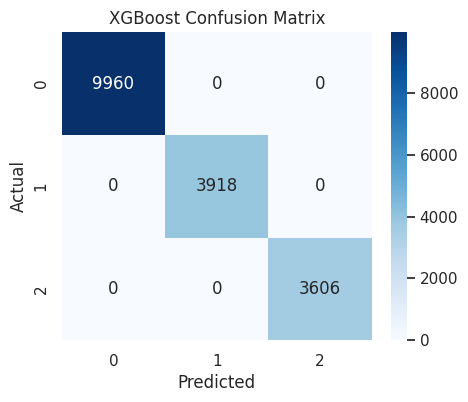

===== FNN =====
Accuracy: 0.9080873941889728
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      9960
           1       0.93      0.93      0.93      3918
           2       0.81      0.81      0.81      3606

    accuracy                           0.91     17484
   macro avg       0.89      0.89      0.89     17484
weighted avg       0.91      0.91      0.91     17484



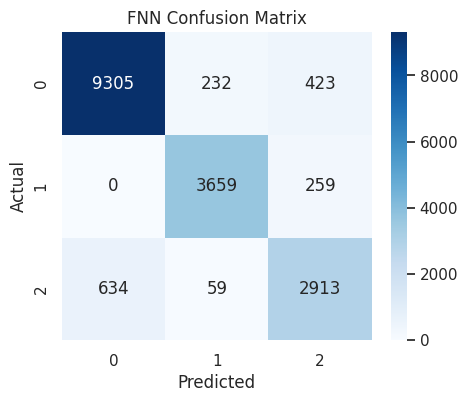

===== LSTM =====
Accuracy: 0.5697122260998913
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73      9958
           1       0.00      0.00      0.00      3918
           2       0.00      0.00      0.00      3603

    accuracy                           0.57     17479
   macro avg       0.19      0.33      0.24     17479
weighted avg       0.32      0.57      0.41     17479



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


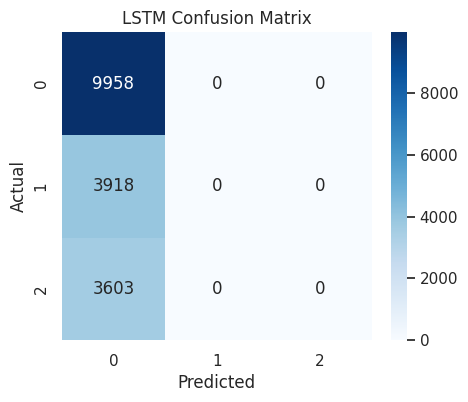

===== 1D-CNN =====
Accuracy: 0.5697122260998913
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73      9958
           1       0.00      0.00      0.00      3918
           2       0.00      0.00      0.00      3603

    accuracy                           0.57     17479
   macro avg       0.19      0.33      0.24     17479
weighted avg       0.32      0.57      0.41     17479



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


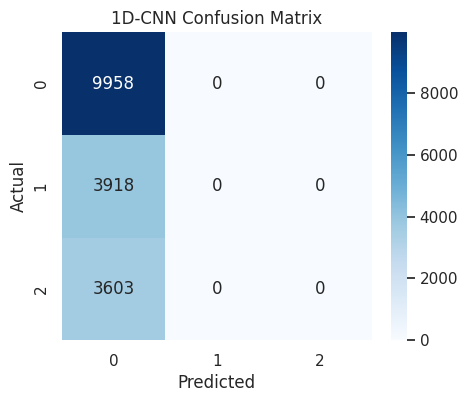

FAST VERSION: Evaluation complete!


In [13]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")

# Step 1: Load preprocessed dataset
data = pd.read_csv('/content/sample_data/drone_data_preprocessed.csv')
X = data.drop('Label', axis=1).values
y = data['Label'].values

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Load models
svm_model = joblib.load("svm_model_fast.pkl")
xgb_model = joblib.load("xgb_model_fast.pkl")
fnn_model = load_model("fnn_model_fast.h5")
lstm_model = load_model("lstm_model_fast.h5")
cnn_model = load_model("cnn_model_fast.h5")

# Step 3: Prepare sequence data for LSTM/1D-CNN
def create_sequences(X, y, time_steps=5):
    X_seq, y_seq = [], []
    for i in range(len(X)-time_steps):
        X_seq.append(X[i:(i+time_steps)])
        y_seq.append(y[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 5
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

# Step 4: Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_fnn = np.argmax(fnn_model.predict(X_test_scaled), axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test_seq), axis=1)
y_pred_cnn = np.argmax(cnn_model.predict(X_test_seq), axis=1)

# Step 5: Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 6: Evaluate all models
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_fnn, "FNN")
evaluate_model(y_test_seq, y_pred_lstm, "LSTM")
evaluate_model(y_test_seq, y_pred_cnn, "1D-CNN")

print("FAST VERSION: Evaluation complete!")
